## Logistic Regression - binary case
We will look on the classic IRIS data set, and construct a classifier for the setosa flower (class 0) based on sepal length (feature 0)


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
print("size of data {}\nnames of columns {}\ntarget label size {}\nlabel names {}".format(iris.data.shape, iris.feature_names, iris.target.shape, iris.target_names))

size of data (150, 4)
names of columns ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target label size (150,)
label names ['setosa' 'versicolor' 'virginica']


## Pandas
Now we want to use pandas dataframes to explore the data a bit. Lets create a dataframe for the data and the labels and then join them together so we have everything in one spot.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

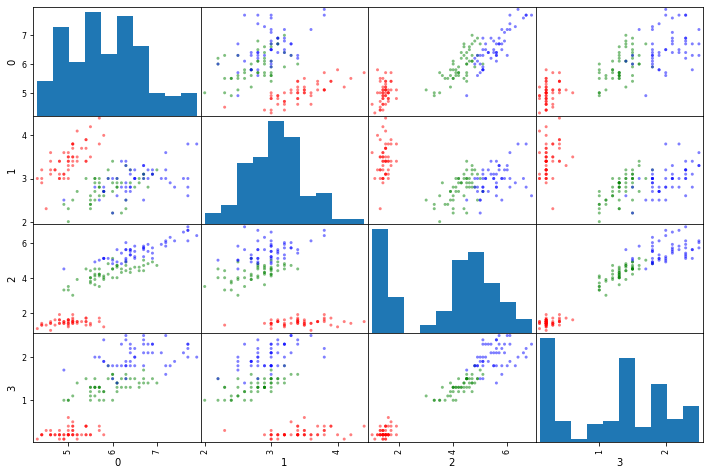

In [13]:
df=pd.DataFrame(iris.data)
colMap={0:"red",1:"green",2:"blue"}
cols=list(map(lambda x:colMap.get(x),iris.target))
scatter_matrix(df,  diagonal='hist',c=cols,figsize = (12,8))
fig1 = plt.gcf()
from google.colab import files
#plt.savefig("plotiris.pdf")
#files.download("plotiris.pdf")


In [14]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:,0:1].reshape(-1,1) # sepal length
y = (iris["target"] == 0).astype(np.int).reshape(-1,1)   # y = 1 if Setosa
logmodel = LogisticRegression()
logmodel.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

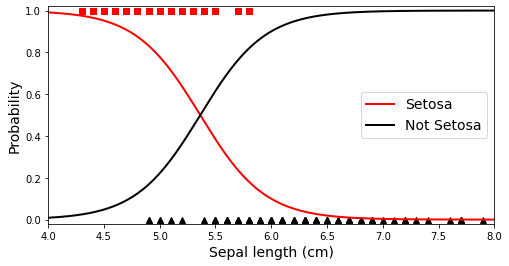

In [17]:
# Plot Setosa probability versus Sepal Length
Xnew = np.linspace(4,8,1000).reshape(-1,1)
yproba = logmodel.predict_proba(Xnew)

plt.figure(figsize=(8, 4))
plt.plot(X[y==1], y[y==1], "rs")
plt.plot(X[y==0], y[y==0], "k^")
plt.plot(Xnew,yproba[:,1],"r-",linewidth=2,label = "Setosa")
plt.plot(Xnew,1-yproba[:,1],"k-",linewidth=2,label = "Not Setosa")
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])
#plt.savefig("plotiris2.pdf")
#files.download("plotiris2.pdf")